# Features catalogs tutorial (`features`)

This notebook give some insights about the data stored in all the `features` types catalogs.

In [1]:
# import the module and instance the client
import carpyncho 
client = carpyncho.Carpyncho()

Now we download one features catalog

In [2]:
df = client.get_catalog("b214", "features")
df.sample(3)

b214-features: 159MB [01:06, 2.40MB/s]                            


,id,cnt,ra_k,dec_k,vs_type,vs_catalog,Amplitude,Autocor_length,Beyond1Std,Con,...,c89_jk_color,c89_m2,c89_m4,n09_c3,n09_hk_color,n09_jh_color,n09_jk_color,n09_m2,n09_m4,ppmb
246230,32140000304888,66,281.886621,-24.814519,,,0.18675,1.0,0.287879,0.0,...,0.790576,15.292760,15.256852,0.274868,0.188890,0.602440,0.791330,15.479110,15.486869,2.341868
375156,32140000459091,44,281.626075,-24.136333,,,0.27050,1.0,0.431818,0.0,...,0.475020,16.945470,16.877186,0.682651,-0.076031,0.551810,0.475779,17.051519,17.072001,4.627671
264628,32140000328959,39,281.817479,-24.701575,,,0.28200,1.0,0.333333,0.0,...,0.498984,16.798042,16.762198,0.305437,0.071062,0.428715,0.499777,16.923741,16.932339,0.928964


The columns of this catalog are

In [3]:
print(list(df.columns))

['id', 'cnt', 'ra_k', 'dec_k', 'vs_type', 'vs_catalog', 'Amplitude', 'Autocor_length', 'Beyond1Std', 'Con', 'Eta_e', 'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35', 'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65', 'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0', 'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2', 'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_0', 'Freq1_harmonics_rel_phase_1', 'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3', 'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1', 'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3', 'Freq2_harmonics_rel_phase_0', 'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2', 'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0', 'Freq3_harmonics_amplitude_1', 'Freq3_harmonics_amplitude_2', 'Freq3_harmonics_amplitude_3', 'Freq3_harmonics_rel_phase_0', 'Freq3_harmonics_rel_phase_1', 'Freq3_harmonics_rel_phase_2', 'Freq3_harmonics_rel_phase_3',

Where

- **id** (ID): This is the unique identifier of every light curve. If you want to access all the points of the lightcurve of a source wiht any *id*, you can search for the same value of a `bm_src_id`in the `lc` of the same tile of the features catalog.
- **cnt** (Count): How many epochs has the lightcurve.
- **ra_k**: Right Ascension in band $K_s$ of the source in the first epoch.
- **dec_k**: Declination in band $K_s$ of the source in the first epoch.
- **vs_type** (Variable Star Type): The type of the source if is  a variable star tagged with the OGLE-III, OGLE-IV and VIZIER catalogs; or empty if the source has no type.
- **vs_catalog** (Variable Star Catalog): From which catalog the *vs_type* was extracted.

All the other columns (Except the last 13) are the features itself And can be consulted here [https://feets.readthedocs.io/en/latest/tutorial.html#The-Features](https://feets.readthedocs.io/en/latest/tutorial.html#The-Features)

Finally the reddening free features are:


- **c89_c3**: $C3$ Pseudo-color using the cardelli-89 extinction
    law.
- **c89_ab_color**: Magnitude difference in the first epoch between the band $a$ and the
    band $b$ using the Cardelli-89 extinction law. Where
    $a$ and $b$ can be the bands $H$, $J$ and $K_s$.
- **c89_m2** and **c89_m4**: $m2$ and $m4$ pseudo-magnitudes using the
    Cardelli-89 extinction law.
- **n09_c3**: $C3$ Pseudo-color using the Nishiyama-09 extinction law.
- **n09_ab_color**: Magnitude difference in the first epoch between the band $a$ and the
    band $b$ using the nishiyama-09 extinction law.
    Where $a$ and $b$ can be the bands $H$, $J$ and $K_s$
- **n09_m2** and **n09_m4**: $m2$ and $m4$ pseudo-magnitudes using the
    nishiyama-09 extinction law.
- **ppmb** (Pseudo-Phase Multi-Band): This index sets the first time in phase
    with respect to the average time in all bands, using the period
    calculated by *feets*.

    $$PPMB = frac(\frac{|mean(HJD_H, HJD_J, HJD_{K_s}) - T_0|}{P})$$

    Where $HJD_H$, $HJD_J$ and $HJD_{K_s}$ are the time of observations
    in the band $H$, $J$ and $K_s$; $T_0$ is the time of observation of
    maximum magnitude in $K_s$ band; $mean$ calculate the mean of the
    three times, $frac$ returns only the decimal part of the number, and
    $P$ is the extracted period.
    
For more information about the extintion laws and pseudo colors/magnitudes:

----

**Cardelli-89 Extinction law:**

> Cardelli, J. A., Clayton, G. C., & Mathis, J. S. (1989). The relationship between infrared, optical, and ultraviolet extinction. The Astrophysical Journal, 345, 245-256.

**Nishiyama-09 Extinction law:**

> Nishiyama, S., Tamura, M., Hatano, H., Kato, D., Tanabé, T., Sugitani, K., & Nagata, T. (2009). Interstellar extinction law toward the galactic center III: J, H, KS bands in the 2MASS and the MKO systems, and 3.6, 4.5, 5.8, 8.0 μm in the Spitzer/IRAC system. The Astrophysical Journal, 696(2), 1407.

**Pseudo colors/magnitudes:**

> Catelan, M., Minniti, D., Lucas, P. W., Alonso-Garcia, J., Angeloni, R., Beamin, J. C., ... & Dekany, I. (2011). The Vista Variables in the Via Lactea (VVV) ESO Public Survey: Current Status and First Results. arXiv preprint arXiv:1105.1119.

Well lets play with the data of 3 Variable star

In [4]:
rrs = df[df.vs_type == "RRLyr-RRab"][:3]
rrs

,id,cnt,ra_k,dec_k,vs_type,vs_catalog,Amplitude,Autocor_length,Beyond1Std,Con,...,c89_jk_color,c89_m2,c89_m4,n09_c3,n09_hk_color,n09_jh_color,n09_jk_color,n09_m2,n09_m4,ppmb
4456,32140000002913,68,280.582129,-25.299033,RRLyr-RRab,vizier,0.12600,1.0,0.279412,0.0,...,0.162897,13.827993,13.819663,0.053522,0.040231,0.123061,0.163291,13.893530,13.895081,1.629816
21827,32140000030432,68,280.482488,-25.156328,RRLyr-RRab,vizier,0.17275,1.0,0.235294,0.0,...,0.221322,13.112390,13.104045,0.049464,0.062893,0.158674,0.221566,13.185733,13.187114,1.672651
21929,32140000030564,68,281.279492,-25.499744,RRLyr-RRab,vizier,0.18400,1.0,0.308824,0.0,...,0.314535,14.001622,13.984766,0.128221,0.068086,0.246717,0.314803,14.087323,14.090839,2.006219


We can check their mean of magnitudes to check if the source is not saturated or diffuse.

In [5]:
rrs.Mean

4456     14.086691
21827    13.488265
21929    14.412221
Name: Mean, dtype: float64

The three are between 12 an 16.5, so they are ok, and their pulsation?

In [6]:
rrs.Std

4456     0.071391
21827    0.090222
21929    0.120290
Name: Std, dtype: float64

Plotting time: we need the lc catalog to show the phased-folded light curve.

In [7]:
lcs = client.get_catalog("b214", "lc")

Now to reduce the memory footprint we can retrieve the lc for only our 3 selected stars

In [8]:
lcs = lcs[lcs.bm_src_id.isin(rrs.id)]

For make our code simple we can use to folde the light curve the [PyAstronomy](https://www.hs.uni-hamburg.de/DE/Ins/Per/Czesla/PyA/PyA/index.html) and numpy library 

In [9]:
from PyAstronomy.pyasl import foldAt
import numpy as np

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt

now we can plot the folded and unfolded lightcurves

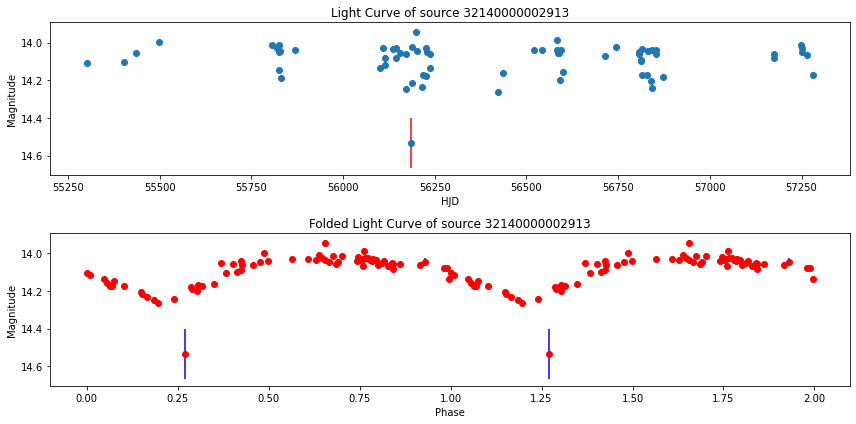

In [11]:
# get one ot the 3 sources
rr = rrs.iloc[0]

# retrieve the lightcurve for this rr
lc = lcs[lcs.bm_src_id == rr.id]

# sort by time
lc = lc.sort_values("pwp_stack_src_hjd")

# split in time, magnitude and error 
time, mag, err = (
        lc.pwp_stack_src_hjd.values,
        lc.pwp_stack_src_mag3.values,
        lc.pwp_stack_src_mag_err3.values)

# t0 is the first time
t0 = time[0]

# fold
phases = foldAt(time, rr.PeriodLS, T0=t0)
sort = np.argsort(phases)
phases, pmag, perr = phases[sort], mag[sort], err[sort]

# duplicate the values in two phases
phases = np.hstack((phases, phases + 1))
pmag = np.hstack((pmag, pmag))
perr = np.hstack((perr, perr))

# now create two plot for the folded and the unfolde LC
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# first lets plot the unfolded lc
ax = axes[0]
ax.errorbar(time, mag, err, ls="", marker="o", ecolor="red")
ax.set_title(f"Light Curve of source {rr.id}")
ax.set_ylabel("Magnitude")
ax.set_xlabel("HJD")
ax.invert_yaxis()

# now the folded lc
ax = axes[1]
ax.errorbar(phases, pmag, perr, ls="", marker="o", ecolor="blue", color="red")
ax.set_title(f"Folded Light Curve of source {rr.id}")
ax.set_ylabel("Magnitude")
ax.set_xlabel("Phase")
ax.invert_yaxis()

fig.tight_layout()

The next light curve

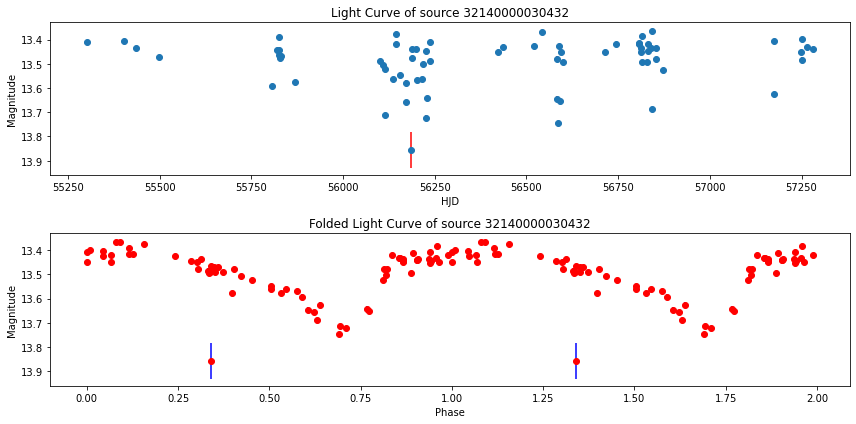

In [12]:
rr = rrs.iloc[1]
lc = lcs[lcs.bm_src_id == rr.id]
lc = lc.sort_values("pwp_stack_src_hjd")

time, mag, err = (
        lc.pwp_stack_src_hjd.values,
        lc.pwp_stack_src_mag3.values,
        lc.pwp_stack_src_mag_err3.values)

t0 = time[0]

phases = foldAt(time, rr.PeriodLS, T0=t0)
sort = np.argsort(phases)
phases, pmag, perr = phases[sort], mag[sort], err[sort]

phases = np.hstack((phases, phases + 1))
pmag = np.hstack((pmag, pmag))
perr = np.hstack((perr, perr))


fig, axes = plt.subplots(2, 1, figsize=(12, 6))

ax = axes[0]
ax.errorbar(time, mag, err, ls="", marker="o", ecolor="red")
ax.set_title(f"Light Curve of source {rr.id}")
ax.set_ylabel("Magnitude")
ax.set_xlabel("HJD")
ax.invert_yaxis()

ax = axes[1]
ax.errorbar(phases, pmag, perr, ls="", marker="o", ecolor="blue", color="red")
ax.set_title(f"Folded Light Curve of source {rr.id}")
ax.set_ylabel("Magnitude")
ax.set_xlabel("Phase")
ax.invert_yaxis()

fig.tight_layout()

And the final one

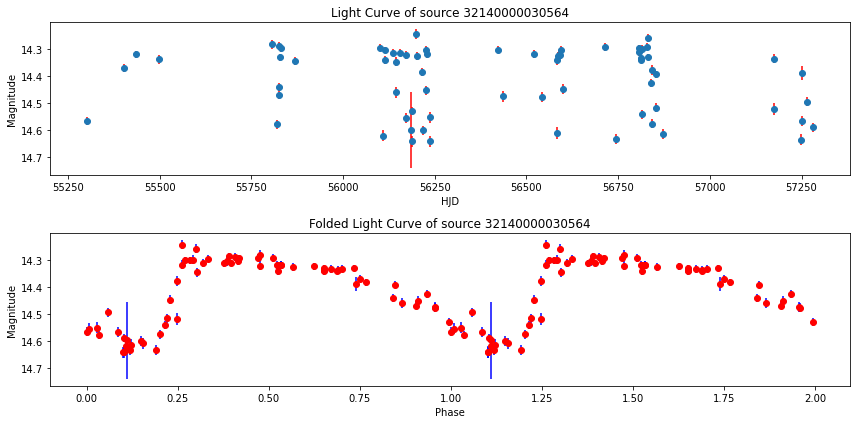

In [13]:
rr = rrs.iloc[2]
lc = lcs[lcs.bm_src_id == rr.id]
lc = lc.sort_values("pwp_stack_src_hjd")

time, mag, err = (
        lc.pwp_stack_src_hjd.values,
        lc.pwp_stack_src_mag3.values,
        lc.pwp_stack_src_mag_err3.values)

t0 = time[0]

phases = foldAt(time, rr.PeriodLS, T0=t0)
sort = np.argsort(phases)
phases, pmag, perr = phases[sort], mag[sort], err[sort]

phases = np.hstack((phases, phases + 1))
pmag = np.hstack((pmag, pmag))
perr = np.hstack((perr, perr))


fig, axes = plt.subplots(2, 1, figsize=(12, 6))

ax = axes[0]
ax.errorbar(time, mag, err, ls="", marker="o", ecolor="red")
ax.set_title(f"Light Curve of source {rr.id}")
ax.set_ylabel("Magnitude")
ax.set_xlabel("HJD")
ax.invert_yaxis()

ax = axes[1]
ax.errorbar(phases, pmag, perr, ls="", marker="o", ecolor="blue", color="red")
ax.set_title(f"Folded Light Curve of source {rr.id}")
ax.set_ylabel("Magnitude")
ax.set_xlabel("Phase")
ax.invert_yaxis()

fig.tight_layout()

In [14]:
import datetime as dt
dt.datetime.now()

datetime.datetime(2022, 6, 13, 0, 13, 25, 563015)